In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
X = [[1, -0.309, 0.091, 0.158, 0.344], [-0.309, 1, 0.192, 0.120, -0.166], [0.091, 0.192, 1, 0.745, 0.320], [0.158, 0.120, 0.745, 1, 0.464], [0.344, -0.166, 0.320, 0.464, 1]]

# 1 - rho_yi|x ** 2 = det(S_i) / (s_ii * det(S_xx)

def second_moment(X, var_of_interest, control_vars):
    S = np.array(X)

    S_xx = S[control_vars][:, control_vars]
    S_yx = S[var_of_interest][:, control_vars]
    S_xy = S[control_vars][:, var_of_interest]
    S_yy = S[var_of_interest[0]][var_of_interest]
    
    S_i = np.zeros((1 + len(control_vars), 1 + len(control_vars)))
    S_i[:len(control_vars), :len(control_vars)] = S_xx
    S_i[len(control_vars):, len(control_vars):] = S_yy
    S_i[:len(control_vars), len(control_vars):] = S_xy
    S_i[len(control_vars):, :len(control_vars)] = S_yx

    det_S = np.linalg.det(S_i)
    det_S_xx = np.linalg.det(S_xx)

    return 1 - det_S / (S_yy * det_S_xx)

print(second_moment(X, [3], [0, 1]))

[0.05647342]


In [37]:
heptathlon_path = "Data/heptathlon.txt"

heptathlon = pd.read_csv(heptathlon_path, sep=" ")
heptathlon.head()

,Name,Points,Hurdles,High Jump,Shot,Run200,Longjump,Javelin,Run800
0,"Joyner_Kersee,(USA)",7291,12.69,1.86,15.80,22.56,7.27,45.66,128.51
1,"John,(GDR)",6897,12.85,1.80,16.23,23.65,6.71,42.56,126.14
2,"Behmer,(GDR)",6858,13.20,1.83,14.20,23.10,6.68,44.54,124.20
3,"Choubenkova,(URS)",6540,13.51,1.74,14.76,23.93,6.32,47.46,127.90
4,"Sablovskaite,(URS)",6456,13.61,1.80,15.23,23.92,6.25,42.78,132.24


<Axes: >

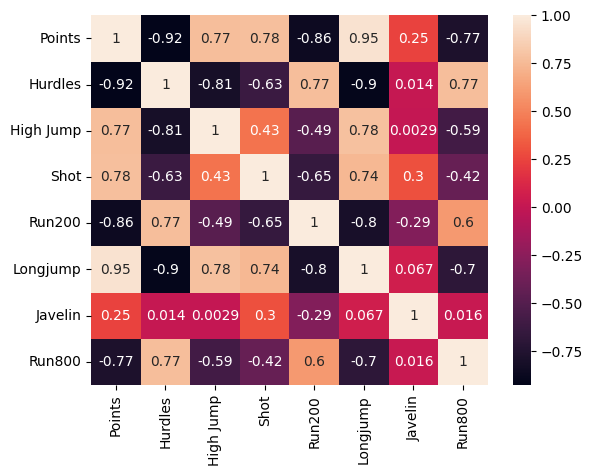

In [41]:
import seaborn as sns

#sns.pairplot(heptathlon)
heptathlon_without_names = heptathlon.drop(columns="Name")
sns.heatmap(heptathlon_without_names.corr(), annot=True)

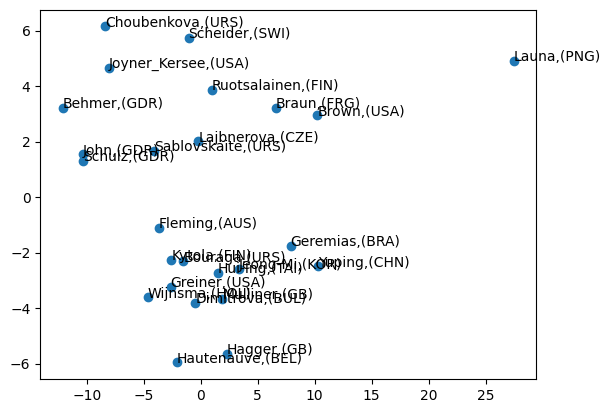

In [48]:
# pca
from sklearn.decomposition import PCA

pca = PCA()

X = heptathlon_without_names.drop(columns="Points").values

X_pca = pca.fit_transform(X)

fig, ax = plt.subplots()

ax.scatter(X_pca[:, 0], X_pca[:, 1])

for i, txt in enumerate(heptathlon["Name"]):
    ax.annotate(txt, (X_pca[i, 0], X_pca[i, 1]), fontsize=10)

plt.show()

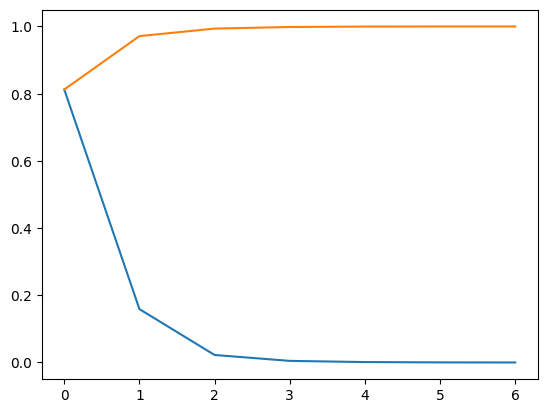

In [71]:
fig, ax = plt.subplots()

ax.plot(pca.explained_variance_ratio_)
ax.plot(np.cumsum(pca.explained_variance_ratio_))

plt.show()

<Axes: >

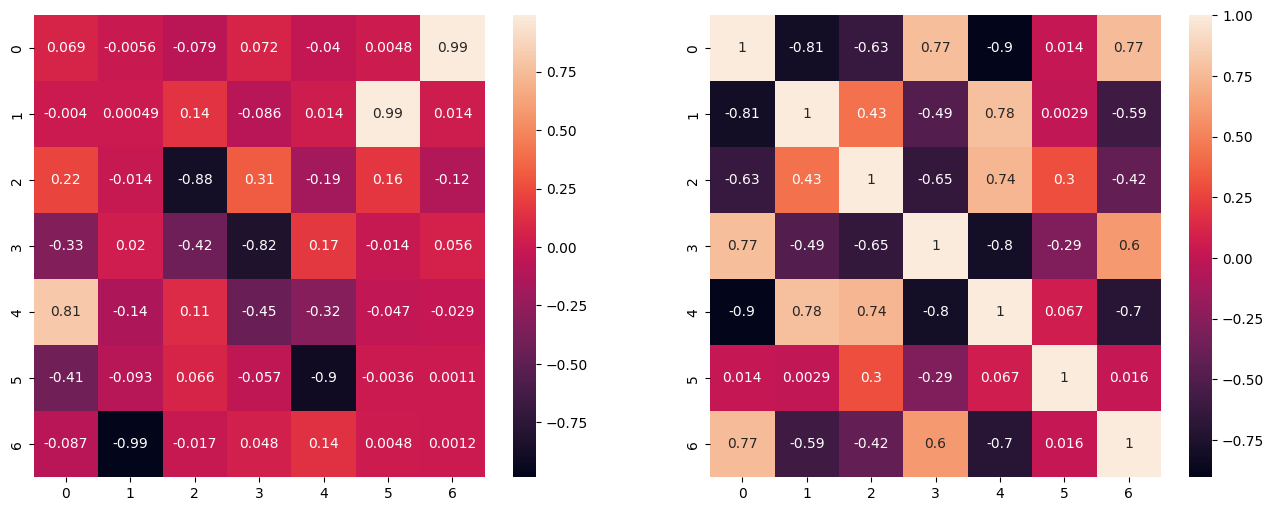

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(pca.components_, annot=True, ax=ax[0])
sns.heatmap(np.corrcoef(X.T), annot=True, ax=ax[1])